In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Portfolio Optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

## Import data

In [2]:
crypto = pd.read_csv("cryptocurrencies_historical_data")

crypto = crypto.set_index('Date')

crypto.index = pd.to_datetime(crypto.index)

crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2020-07-03 to 2023-07-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTCUSDT   1095 non-null   float64
 1   ETHUSDT   1095 non-null   float64
 2   XRPUSDT   1095 non-null   float64
 3   DOGEUSDT  1095 non-null   float64
 4   LTCUSDT   1095 non-null   float64
 5   ADAUSDT   1095 non-null   float64
dtypes: float64(6)
memory usage: 59.9 KB


In [3]:
crypto.head(3)

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
Date,,,,,,
2020-07-03,9058.26,224.87,0.17620,0.002314,41.14,0.09655
2020-07-04,9135.46,229.17,0.17808,0.002301,42.11,0.10005
2020-07-05,9069.41,227.56,0.17695,0.002303,41.58,0.09813


In [4]:
crypto.tail(3)

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
Date,,,,,,
2023-06-30,30472.00,1933.79,0.4729,0.06646,108.70,0.2869
2023-07-01,30585.90,1924.50,0.4732,0.06851,107.10,0.2924
2023-07-02,30450.55,1917.29,0.4823,0.06782,111.45,0.2892


## Cryptocurrencies Data Exploration

In [5]:
crypto_returns = crypto.pct_change().dropna() # get daily returns 

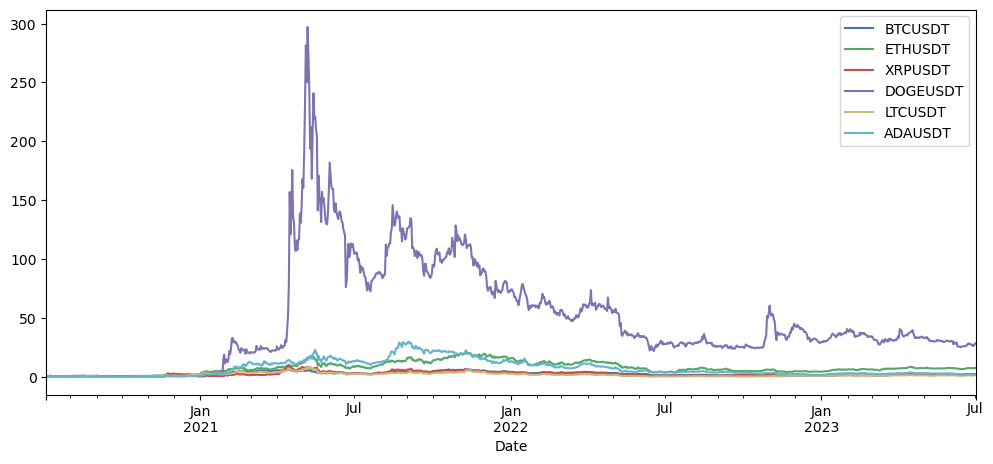

In [6]:
# Visualize cumulative returns

daily_cum_return = (1 + crypto_returns).cumprod()-1

daily_cum_return.plot(figsize = (12, 5))

plt.show()

In [7]:
# Calculate the total return : (current price - initial price)/ initial price
total_return = (crypto.iloc[-1] - crypto.iloc[0]) / crypto.iloc[0]

print(total_return)

BTCUSDT      2.361633
ETHUSDT      7.526215
XRPUSDT      1.737230
DOGEUSDT    28.309823
LTCUSDT      1.709042
ADAUSDT      1.995339
dtype: float64


In [8]:
# Annualized return : Yearly rate of return inferred from any time period.
annualized_return = ((1 + total_return)**(1/3))-1 

print(annualized_return)

BTCUSDT     0.498017
ETHUSDT     1.042923
XRPUSDT     0.398848
DOGEUSDT    2.083219
LTCUSDT     0.394029
ADAUSDT     0.441502
dtype: float64


In [9]:
# Annualized volatility(variance)

annualized_volatility = crypto_returns.var() * 365

annualized_volatility

BTCUSDT     0.448185
ETHUSDT     0.793807
XRPUSDT     1.437418
DOGEUSDT    7.539375
LTCUSDT     0.980485
ADAUSDT     1.129702
dtype: float64

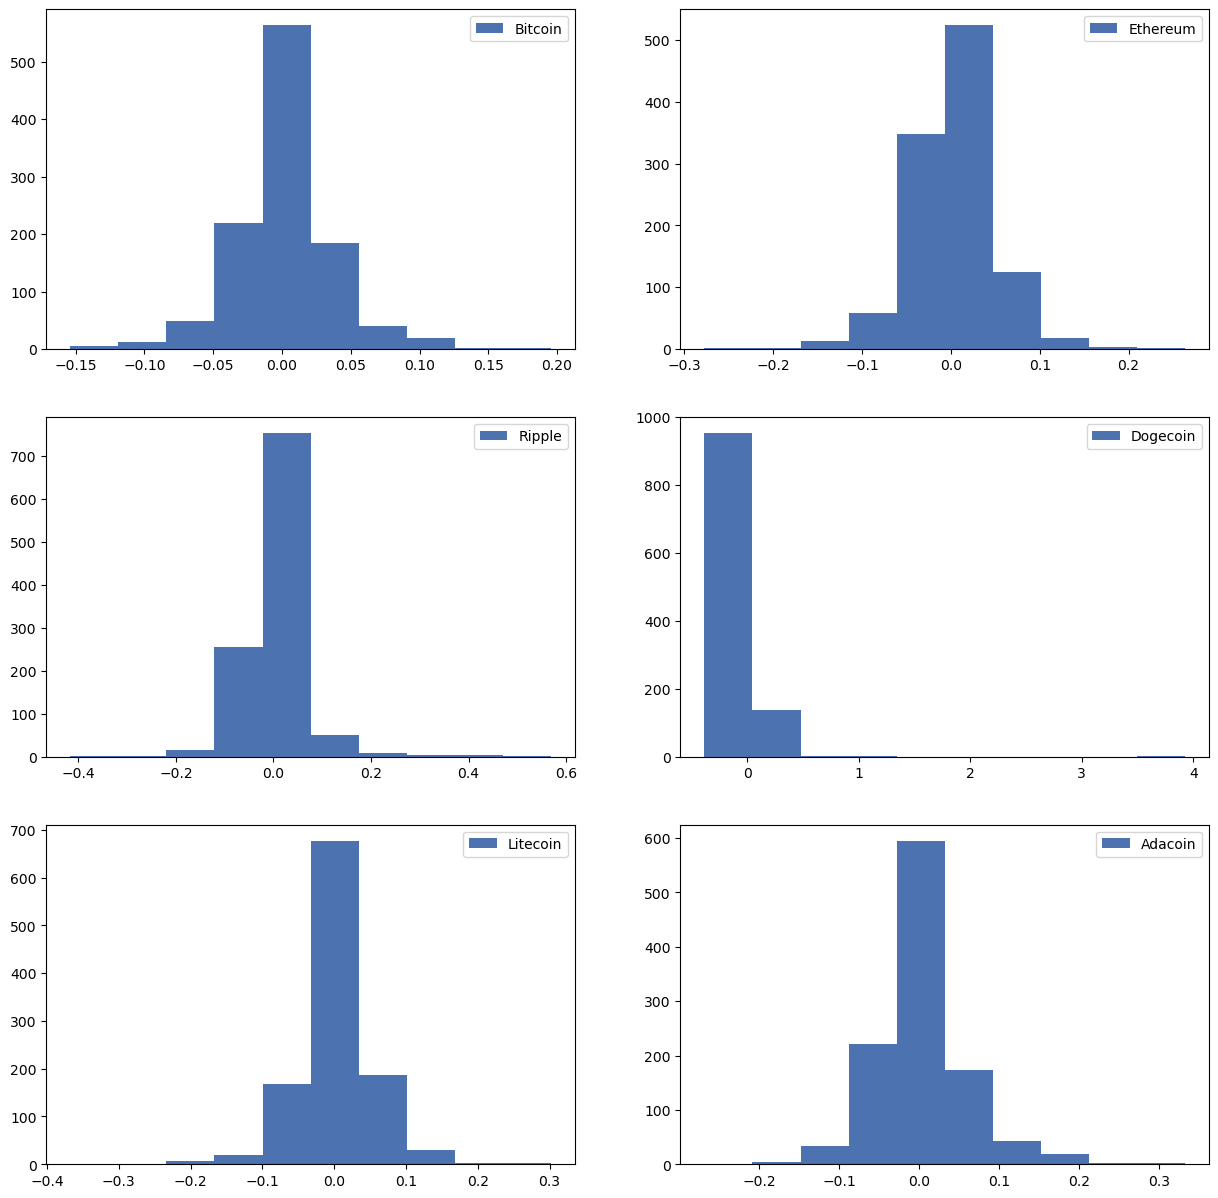

In [10]:
# Daily Returns distribution

fig, axs = plt.subplots(3, 2, figsize = (15, 15))

axs[0, 0].hist(crypto_returns["BTCUSDT"], label = "Bitcoin")
axs[0, 1].hist(crypto_returns["ETHUSDT"], label = "Ethereum")
axs[1, 0].hist(crypto_returns["XRPUSDT"], label = "Ripple")
axs[1, 1].hist(crypto_returns["DOGEUSDT"], label = "Dogecoin")
axs[2, 0].hist(crypto_returns["LTCUSDT"], label = "Litecoin")
axs[2, 1].hist(crypto_returns["ADAUSDT"], label = "Adacoin")


axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[2, 0].legend()
axs[2, 1].legend()


plt.show()

In [11]:
crypto_returns.describe().loc["mean": "std"]

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
mean,0.001722,0.003052,0.002813,0.008121,0.002270,0.002520
std,0.035041,0.046635,0.062755,0.143721,0.051829,0.055633


In [12]:
# Daily returns skewness
crypto_returns.skew()

BTCUSDT      0.070822
ETHUSDT      0.001533
XRPUSDT      1.608936
DOGEUSDT    19.187899
LTCUSDT     -0.088014
ADAUSDT      0.700015
dtype: float64

In [13]:
# Daily returns kurtosis
crypto_returns.kurtosis()

BTCUSDT       3.033067
ETHUSDT       3.908871
XRPUSDT      16.055580
DOGEUSDT    508.083338
LTCUSDT       5.286885
ADAUSDT       3.822741
dtype: float64

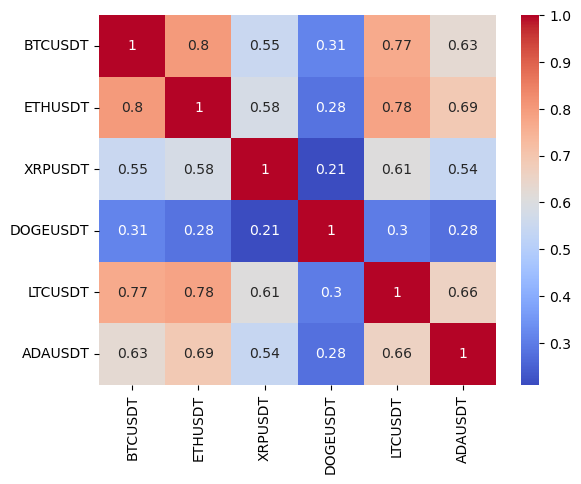

In [14]:
# Calculate correlation matrix.
correlation_matrix = crypto_returns.corr()

sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

plt.show()

## Portfolio Optimization

In [15]:
# Calculate expected annualized returns and sample covariance

mu = expected_returns.mean_historical_return(crypto, frequency = 365)

mu

BTCUSDT     0.498571
ETHUSDT     1.044258
XRPUSDT     0.399277
DOGEUSDT    2.086394
LTCUSDT     0.394453
ADAUSDT     0.441984
dtype: float64

In [16]:
Sigma = risk_models.sample_cov(crypto, frequency = 365)

Sigma

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
BTCUSDT,0.448185,0.477533,0.440659,0.575771,0.508616,0.447210
ETHUSDT,0.477533,0.793807,0.620018,0.694581,0.691662,0.653087
XRPUSDT,0.440659,0.620018,1.437418,0.691611,0.719344,0.692012
DOGEUSDT,0.575771,0.694581,0.691611,7.539375,0.811256,0.804654
LTCUSDT,0.508616,0.691662,0.719344,0.811256,0.980485,0.692347
ADAUSDT,0.447210,0.653087,0.692012,0.804654,0.692347,1.129702


In [17]:
efficient_frontier = EfficientFrontier(mu, Sigma)

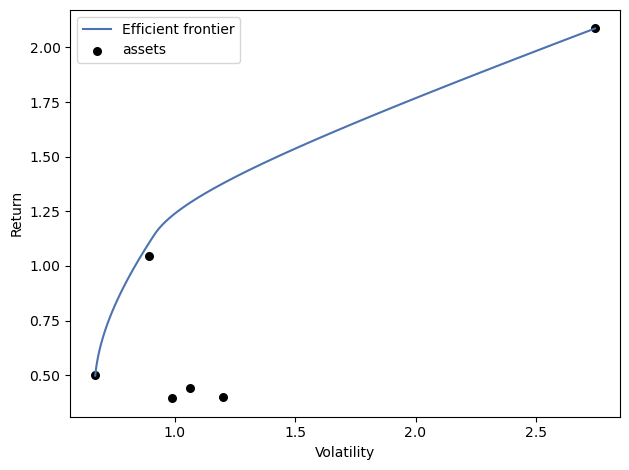

In [18]:
plotting.plot_efficient_frontier(efficient_frontier)
        
plt.show()

In [19]:
# Efficient frontier 

# Choose optimal portfolio based on maximum sharpe ratio()
def max_sharpe_portfolio_performance(mu, Sigma):
    ef = EfficientFrontier(mu, Sigma)
    
    raw_weights = ef.max_sharpe()
    
    return ef.clean_weights(), ef.portfolio_performance(verbose = True)


# Choose maximum return portfolio based on minimum volatility.
def min_volatility_portfolio_performance(mu, Sigma):
    ef = EfficientFrontier(mu, Sigma)
    
    raw_weights = ef.min_volatility(), ef.portfolio_performance(verbose = True)
    
    return ef.clean_weights()


# Select an optimal return for a target risk
def efficient_risk_portfolio_performance(mu, Sigma, risk = None):
    ef = EfficientFrontier(mu, Sigma)
    
    return ef.efficient_risk(risk), ef.portfolio_performance(verbose = True)



# Select a minimal risk for a target return
def efficient_return_portfolio_performance(mu, Sigma, rturn = None):
    ef = EfficientFrontier(mu, Sigma)
    
    return ef.efficient_return(rturn), ef.portfolio_performance(verbose = True)

In [20]:
max_sharpe_portfolio_performance(mu, Sigma)

Expected annual return: 117.8%
Annual volatility: 94.0%
Sharpe Ratio: 1.23


(OrderedDict([('BTCUSDT', 0.0),
              ('ETHUSDT', 0.87127),
              ('XRPUSDT', 0.0),
              ('DOGEUSDT', 0.12873),
              ('LTCUSDT', 0.0),
              ('ADAUSDT', 0.0)]),
 (1.1784103165582496, 0.9398561081605387, 1.2325400734219405))

In [21]:
min_volatility_portfolio_performance(mu, Sigma)

Expected annual return: 49.8%
Annual volatility: 66.9%
Sharpe Ratio: 0.71


OrderedDict([('BTCUSDT', 0.99251),
             ('ETHUSDT', 0.0),
             ('XRPUSDT', 0.00749),
             ('DOGEUSDT', 0.0),
             ('LTCUSDT', 0.0),
             ('ADAUSDT', 0.0)])

In [22]:
efficient_risk_portfolio_performance(mu, Sigma, risk = 0.7)

Expected annual return: 66.8%
Annual volatility: 70.0%
Sharpe Ratio: 0.93


(OrderedDict([('BTCUSDT', 0.7307374385291595),
              ('ETHUSDT', 0.2476095669508442),
              ('XRPUSDT', 2.4246181e-09),
              ('DOGEUSDT', 0.021652989021503),
              ('LTCUSDT', 9.744377e-10),
              ('ADAUSDT', 2.1023734e-09)]),
 (0.6680691633109875, 0.7000000023101662, 0.9258130873888648))

In [23]:
efficient_return_portfolio_performance(mu, Sigma, rturn = 0.8)

Expected annual return: 80.0%
Annual volatility: 74.3%
Sharpe Ratio: 1.05


(OrderedDict([('BTCUSDT', 0.5283262772041724),
              ('ETHUSDT', 0.4294114914652777),
              ('XRPUSDT', 0.0),
              ('DOGEUSDT', 0.04226223133055),
              ('LTCUSDT', 0.0),
              ('ADAUSDT', 0.0)]),
 (0.8000000000000005, 0.7433292192810996, 1.0493331618987969))

### Downside risk in the optimization

In [24]:
mu = expected_returns.mean_historical_return(crypto, frequency = 365)

mu

BTCUSDT     0.498571
ETHUSDT     1.044258
XRPUSDT     0.399277
DOGEUSDT    2.086394
LTCUSDT     0.394453
ADAUSDT     0.441984
dtype: float64

In [25]:
Sigma = risk_models.semicovariance(crypto, frequency = 365, benchmark = 0)

Sigma

,BTCUSDT,ETHUSDT,XRPUSDT,DOGEUSDT,LTCUSDT,ADAUSDT
BTCUSDT,0.204016,0.243516,0.244788,0.265924,0.267131,0.252987
ETHUSDT,0.243516,0.360932,0.337991,0.351866,0.360552,0.347664
XRPUSDT,0.244788,0.337991,0.523196,0.411084,0.393138,0.382206
DOGEUSDT,0.265924,0.351866,0.411084,0.636190,0.410273,0.393445
LTCUSDT,0.267131,0.360552,0.393138,0.410273,0.462008,0.391113
ADAUSDT,0.252987,0.347664,0.382206,0.393445,0.391113,0.448359


In [26]:
max_sharpe_portfolio_performance(mu, Sigma)

Expected annual return: 208.6%
Annual volatility: 79.8%
Sharpe Ratio: 2.59


(OrderedDict([('BTCUSDT', 0.0),
              ('ETHUSDT', 0.0),
              ('XRPUSDT', 0.0),
              ('DOGEUSDT', 1.0),
              ('LTCUSDT', 0.0),
              ('ADAUSDT', 0.0)]),
 (2.0863941515847073, 0.7976152621044326, 2.5907154110024444))

In [27]:
min_volatility_portfolio_performance(mu, Sigma)

Expected annual return: 49.9%
Annual volatility: 45.2%
Sharpe Ratio: 1.06


OrderedDict([('BTCUSDT', 1.0),
             ('ETHUSDT', 0.0),
             ('XRPUSDT', 0.0),
             ('DOGEUSDT', 0.0),
             ('LTCUSDT', 0.0),
             ('ADAUSDT', 0.0)])

In [28]:
efficient_risk_portfolio_performance(mu, Sigma, risk = 0.7)

Expected annual return: 176.8%
Annual volatility: 70.0%
Sharpe Ratio: 2.50


(OrderedDict([('BTCUSDT', 2.11636057e-08),
              ('ETHUSDT', 0.3051153366195032),
              ('XRPUSDT', 8.388249e-10),
              ('DOGEUSDT', 0.6948846396311972),
              ('LTCUSDT', 8.009366e-10),
              ('ADAUSDT', 9.458082e-10)]),
 (1.7684223679616435, 0.6999999998332649, 2.4977462405401507))

In [29]:
efficient_return_portfolio_performance(mu, Sigma, rturn = 0.8)

Expected annual return: 80.0%
Annual volatility: 48.9%
Sharpe Ratio: 1.60


(OrderedDict([('BTCUSDT', 0.81016192881194),
              ('ETHUSDT', 0.0),
              ('XRPUSDT', 0.0),
              ('DOGEUSDT', 0.1898380711880599),
              ('LTCUSDT', 0.0),
              ('ADAUSDT', 0.0)]),
 (0.8, 0.4885016074966147, 1.5967194130582374))

In [30]:
# Let's convert the weights into actual allocations. 
# How much many invest to each cryptocurrency ?

# Let's we decided to invest 500 dolar and we have choosed minimum volatility.

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [31]:
investment_amount = 500

mu = expected_returns.mean_historical_return(crypto, frequency = 365)

Sigma = risk_models.sample_cov(crypto, frequency = 365)

efficient_frontier = EfficientFrontier(mu, Sigma)

weights_minimum_volatility = efficient_frontier.min_volatility()

weights_minimum_volatility

OrderedDict([('BTCUSDT', 0.9925055947314968),
             ('ETHUSDT', 0.0),
             ('XRPUSDT', 0.0074944052685033),
             ('DOGEUSDT', 0.0),
             ('LTCUSDT', 0.0),
             ('ADAUSDT', 0.0)])

In [32]:
efficient_frontier.portfolio_performance(verbose = True)

Expected annual return: 49.8%
Annual volatility: 66.9%
Sharpe Ratio: 0.71


(0.4978265020659356, 0.6694241453440422, 0.7137873729074451)

In [33]:
latest_prices = get_latest_prices(crypto) # to get latest prices.( Last day prices )

discrete_allocation = DiscreteAllocation(weights_minimum_volatility, latest_prices, total_portfolio_value=investment_amount)

allocation, leftover = discrete_allocation.greedy_portfolio()

print("Discrete Allocation: {}".format(allocation))
print("Funds remaining: {}".format(leftover))

Discrete Allocation: {'XRPUSDT': 7}
Funds remaining: 496.6239
